### Problem Statement:
Build model to predict the price of pizza using various attributes.

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [141]:
df=pd.read_csv(r"pizza_v2.csv")
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


Company: This feature represents the company or brand associated with the pizza. In this dataset, it seems that there's only one company labeled as 'A'. If there were multiple companies, this feature would denote which company each pizza belongs to.

Price (price_rupiah): This feature represents the price of the pizza in Indonesian Rupiah (Rp). In the provided examples, prices are given in Rp235,000 and Rp198,000.

Diameter: This feature denotes the diameter or size of the pizza. In the provided examples, the pizzas have diameters of 22 inches and 20 inches.

Topping: This feature specifies the type of topping(s) on the pizza. For example, "chicken" and "pepperoni" are mentioned in the provided examples.

Variant: This feature represents the variant or type of pizza. In the given examples, the pizzas belong to the "double_signature" variant, indicating a special or signature type of pizza.

Size: This feature denotes the size category of the pizza. In the provided examples, the pizzas are categorized as "jumbo".

Extra Sauce: This feature indicates whether extra sauce is added to the pizza. It can have values like "yes" or "no".

Extra Cheese: This feature indicates whether extra cheese is added to the pizza. It can have values like "yes" or "no".

Extra Mushrooms: This feature indicates whether extra mushrooms are added to the pizza. It can have values like "yes" or "no".

In [142]:
df.shape

(129, 9)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [144]:
df.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


### Data Cleansing and Preprocessing

In [145]:
df[df.duplicated()]

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
110,E,"Rp115,000",17 inch,mozzarella,new_york,XL,no,yes,yes
122,E,"Rp83,000",17 inch,chicken,new_york,XL,no,yes,no


In [146]:
df.drop_duplicates(keep='first',inplace=True)

In [147]:
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [148]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())
    print(30*'==')

company
['A' 'B' 'C' 'D' 'E']
5
price_rupiah
['Rp235,000' 'Rp198,000' 'Rp120,000' 'Rp155,000' 'Rp248,000' 'Rp140,000'
 'Rp110,000' 'Rp70,000' 'Rp90,000' 'Rp230,000' 'Rp188,000' 'Rp114,000'
 'Rp149,000' 'Rp23,500' 'Rp46,000' 'Rp72,000' 'Rp49,000' 'Rp83,000'
 'Rp96,000' 'Rp31,000' 'Rp69,000' 'Rp93,000' 'Rp75,000' 'Rp115,000'
 'Rp123,000' 'Rp33,000' 'Rp76,000' 'Rp119,000' 'Rp126,500' 'Rp39,000'
 'Rp99,000' 'Rp44,000' 'Rp78,000' 'Rp105,000' 'Rp35,000' 'Rp60,000'
 'Rp98,000' 'Rp28,000' 'Rp51,000' 'Rp84,000' 'Rp32,000' 'Rp54,000'
 'Rp92,000']
43
diameter
['22 inch' '20 inch' '16 inch' '14 inch' '18 inch' '18.5 inch' '8 inch'
 '12 inch' '16.5 inch' '8.5 inch' '17 inch' '14 inch\n']
12
topping
['chicken' 'papperoni' 'mushrooms' 'smoked_beef' 'mozzarella'
 'black_papper' 'tuna' 'meat' 'sausage' 'onion' 'vegetables' 'beef']
12
variant
['double_signature' 'american_favorite' 'super_supreme' 'meat_lovers'
 'double_mix' 'classic' 'crunchy' 'new_york' 'double_decker' 'spicy_tuna'
 'BBQ_meat_fiesta' 

In [149]:
df.price_rupiah=df.price_rupiah.str.replace('Rp','').str.replace(',','').astype(int)

In [150]:
df.diameter=df.diameter.str.replace('inch','').str.replace('inch\n','').astype(float)

In [151]:
df.diameter.unique()

array([22. , 20. , 16. , 14. , 18. , 18.5,  8. , 12. , 16.5,  8.5, 17. ])

In [152]:
df.price_rupiah.unique()

array([235000, 198000, 120000, 155000, 248000, 140000, 110000,  70000,
        90000, 230000, 188000, 114000, 149000,  23500,  46000,  72000,
        49000,  83000,  96000,  31000,  69000,  93000,  75000, 115000,
       123000,  33000,  76000, 119000, 126500,  39000,  99000,  44000,
        78000, 105000,  35000,  60000,  98000,  28000,  51000,  84000,
        32000,  54000,  92000])

<Axes: xlabel='price_rupiah', ylabel='Density'>

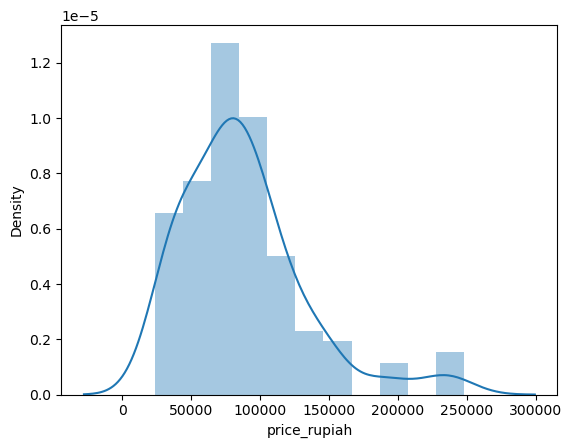

In [153]:
sns.distplot(df.price_rupiah)

In [154]:
df.price_rupiah.describe()

count       127.000000
mean      86964.566929
std       44989.248323
min       23500.000000
25%       50000.000000
50%       78000.000000
75%      105000.000000
max      248000.000000
Name: price_rupiah, dtype: float64

<Axes: xlabel='price_rupiah', ylabel='Density'>

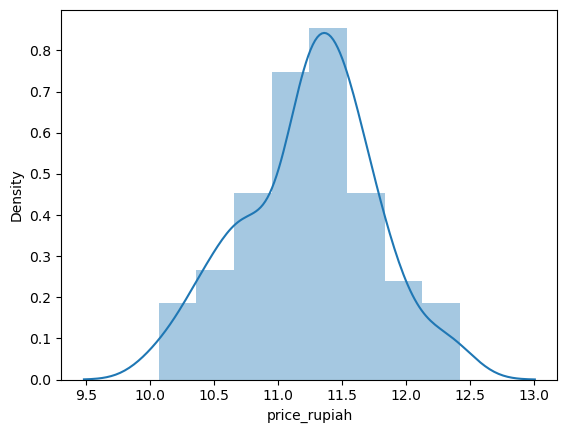

In [155]:
df.price_rupiah=np.log(df.price_rupiah)
sns.distplot(df.price_rupiah)

<Axes: ylabel='price_rupiah'>

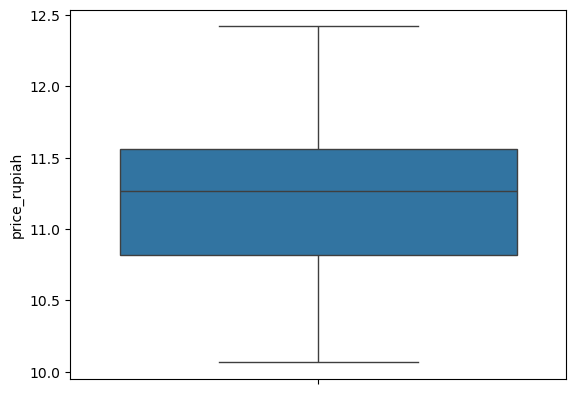

In [156]:
sns.boxplot(df.price_rupiah)

### Model Building

In [158]:
x1=df.drop('price_rupiah',axis=1)
x=pd.get_dummies(x1,drop_first=True).astype(int)
x

,diameter,company_B,company_C,company_D,company_E,topping_black_papper,topping_chicken,topping_meat,topping_mozzarella,topping_mushrooms,...,variant_super_supreme,variant_thai_veggie,size_jumbo,size_large,size_medium,size_reguler,size_small,extra_sauce_yes,extra_cheese_yes,extra_mushrooms_yes
0,22,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,20,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,16,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,1
3,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,18,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,8,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
125,12,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
126,14,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,1
127,8,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1


In [159]:
y1=df.price_rupiah
y=pd.DataFrame(y1)
y

,price_rupiah
0,12.367341
1,12.196022
2,11.695247
3,11.951180
4,12.421184
...,...
124,10.571317
125,11.184421
126,11.502875
127,10.691945


In [160]:
# load the library for spliting 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.20,random_state=0)  #train_size is 80%

In [161]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)    #only for train we use fit
x_test=sc_x.transform(x_test)          # don't use fit for test data

In [162]:
# after standartizing build the model
# building the model
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
sgdr.fit(x_train,y_train)
score=sgdr.score(x_train,y_train)
print('R-squared =',score)

R-squared = 0.8961512414861229


In [163]:
from sklearn.metrics import r2_score
y_test_pred=sgdr.predict(x_test)
r2_score(y_test,y_test_pred)

0.8392797575260431

In [164]:
# prediction
y_pred=sgdr.predict(x_test)

# evaluating the prediction

from sklearn.metrics import mean_squared_error          # to find the MSE (error)
mse=mean_squared_error(y_test,y_pred)
print('MSE =',mse)
print('RMSE =',np.sqrt(mse))

MSE = 0.0446979281964887
RMSE = 0.21141884541470918


In [165]:
print(y_pred[0])

11.220863530536318


In [166]:
print(x_test[0])

[-0.24924291 -0.51234754 -0.55829053 -0.40114778 -0.55829053 -0.17496355
 -0.527713   -0.27288841 -0.43386092  2.30488611  0.         -0.1
 -0.17496355 -0.44986771 -0.27288841 -0.27288841 -0.17496355 -0.14213381
  5.71547607 -0.57353933 -0.27288841 -0.25131234 -0.27288841 -0.20306923
 -0.14213381 -0.14213381 -0.17496355 -0.17496355 -0.31277162 -0.14213381
 -0.29329423 -0.17496355 -0.14213381 -0.20306923 -0.14213381 -0.36719404
 -0.44986771 -0.66547513  2.394438   -0.46569032  0.80977633 -1.57567719
  0.93293642]


## Linear regression

In [167]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

#Now will check the MSE of the model
train_mse=mean_squared_error(y_train,train_pred)
test_mse=mean_squared_error(y_test,test_pred)
print('train_mse =',train_mse)
print('test_mse =',test_mse)

# Now will check the r2_score 
train_r2_score=r2_score(y_train,train_pred)
test_r2_score=r2_score(y_test,test_pred)
print('train_r2_score =',train_r2_score)
print('test_r2_score =',test_r2_score)

train_mse = 0.024310193292428253
test_mse = 0.039589390013031335
train_r2_score = 0.9050652685952008
test_r2_score = 0.8576485170784653


In [168]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model=LinearRegression()
kfold_validation=KFold(10)

results=cross_val_score(model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.53381709 0.93470211 0.87719736 0.29471646 0.93409907 0.77577756
 0.93321874 0.48591001 0.80764657 0.44229295]
0.7019377921347729


## Decision Tree

In [169]:
from sklearn.tree import DecisionTreeRegressor

In [170]:
model1=DecisionTreeRegressor(random_state=0)
model1.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

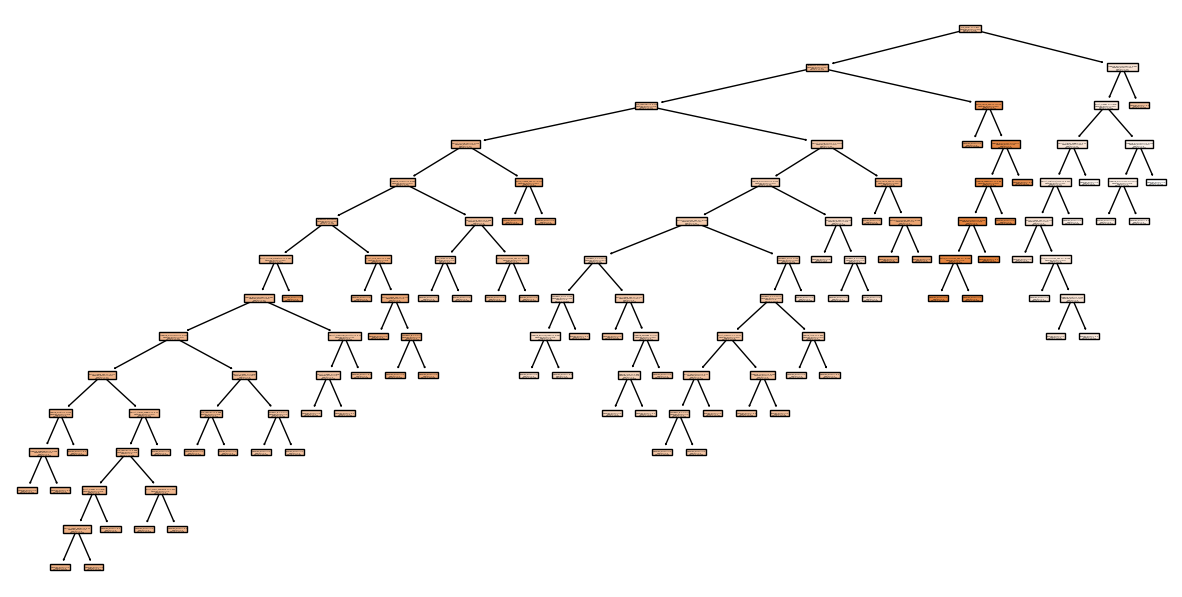

<Figure size 640x480 with 0 Axes>

In [171]:
# Note will plot the tree and see its depth
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(model1,filled=True,class_names=['No HD','Yes HD'],feature_names=x.columns.to_list())
plt.show()
plt.savefig('image')

In [172]:
ytrain_pred = model1.predict(x_train)
ytest_pred = model1.predict(x_test)

In [173]:
# Model Evaluation

train_score = model1.score(x_train,y_train)
test_score = model1.score(x_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 1.0, Testing Score 0.87


In [174]:
from sklearn.metrics import r2_score

# Assuming y_train and y_train_pred are your true and predicted target values, respectively

r2train = r2_score(y_train, ytrain_pred)
r2test= r2_score(y_test,ytest_pred)

print("R-squared train:", r2train)
print("R-squared test:", r2test)

R-squared train: 1.0
R-squared test: 0.8728507579369728


In [175]:
a = model1.cost_complexity_pruning_path(x_train,y_train) 
a

{'ccp_alphas': array([0.00000000e+00, 5.62806127e-16, 5.62806127e-16, 8.44209191e-16,
        8.44209191e-16, 2.25122451e-15, 3.65823983e-15, 5.10250724e-07,
        6.80334299e-07, 1.15799361e-06, 3.05291659e-06, 5.23827267e-06,
        7.79454173e-06, 7.85740900e-06, 1.15747468e-05, 1.19559127e-05,
        1.61736845e-05, 2.69659585e-05, 3.45193674e-05, 3.87009410e-05,
        3.95205308e-05, 4.74246370e-05, 5.19370407e-05, 5.38503885e-05,
        6.42956941e-05, 7.70002496e-05, 7.72949168e-05, 8.04720839e-05,
        1.08931918e-04, 1.49997748e-04, 2.19413532e-04, 2.39882094e-04,
        3.01143410e-04, 3.34548966e-04, 4.01524667e-04, 4.47133143e-04,
        4.83508215e-04, 5.32343430e-04, 6.37613811e-04, 6.60205920e-04,
        7.52603481e-04, 9.05258768e-04, 9.57285433e-04, 1.00530589e-03,
        1.16947416e-03, 1.19263311e-03, 1.52087991e-03, 1.63444706e-03,
        1.72422161e-03, 2.16264426e-03, 2.92475147e-03, 2.94766582e-03,
        4.08158687e-03, 6.46693514e-03, 1.01439942

In [176]:
a['ccp_alphas'][0:-1]

array([0.00000000e+00, 5.62806127e-16, 5.62806127e-16, 8.44209191e-16,
       8.44209191e-16, 2.25122451e-15, 3.65823983e-15, 5.10250724e-07,
       6.80334299e-07, 1.15799361e-06, 3.05291659e-06, 5.23827267e-06,
       7.79454173e-06, 7.85740900e-06, 1.15747468e-05, 1.19559127e-05,
       1.61736845e-05, 2.69659585e-05, 3.45193674e-05, 3.87009410e-05,
       3.95205308e-05, 4.74246370e-05, 5.19370407e-05, 5.38503885e-05,
       6.42956941e-05, 7.70002496e-05, 7.72949168e-05, 8.04720839e-05,
       1.08931918e-04, 1.49997748e-04, 2.19413532e-04, 2.39882094e-04,
       3.01143410e-04, 3.34548966e-04, 4.01524667e-04, 4.47133143e-04,
       4.83508215e-04, 5.32343430e-04, 6.37613811e-04, 6.60205920e-04,
       7.52603481e-04, 9.05258768e-04, 9.57285433e-04, 1.00530589e-03,
       1.16947416e-03, 1.19263311e-03, 1.52087991e-03, 1.63444706e-03,
       1.72422161e-03, 2.16264426e-03, 2.92475147e-03, 2.94766582e-03,
       4.08158687e-03, 6.46693514e-03, 1.01439942e-02, 2.11556774e-02,
      

In [177]:
path=model1.cost_complexity_pruning_path(x_train,y_train)    # determine values for alpha
ccp_alphas= path.ccp_alphas   # extract different values for alpha
ccp_alphas = ccp_alphas[:-1]  # extract the maximum value for alpha

In [178]:
models =[]  # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for i in ccp_alphas:
    model2=DecisionTreeRegressor(random_state=0,ccp_alpha=i)
    model2.fit(x_train,y_train)
    models.append(model2)

In [179]:
models

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=5.628061273347328e-16, random_state=0),
 DecisionTreeRegressor(ccp_alpha=5.628061273347328e-16, random_state=0),
 DecisionTreeRegressor(ccp_alpha=8.442091910020992e-16, random_state=0),
 DecisionTreeRegressor(ccp_alpha=8.442091910020992e-16, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.2512245093389313e-15, random_state=0),
 DecisionTreeRegressor(ccp_alpha=3.6582398276757634e-15, random_state=0),
 DecisionTreeRegressor(ccp_alpha=5.102507244184453e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=6.803342992245936e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.1579936074325598e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=3.0529165888373705e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=5.23827266686855e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=7.794541734076101e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=7.857409000865632e-06, random_state=0),
 Decisio

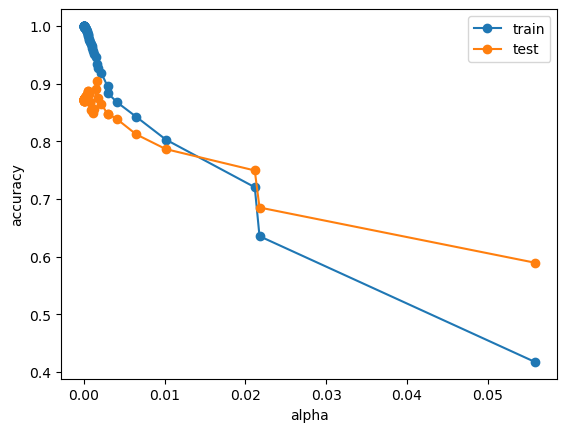

In [180]:
train_scores=[model.score(x_train,y_train) for model in models]
test_scores=[model.score(x_test,y_test) for model in models]


plt.plot(ccp_alphas,train_scores,marker='o',label='train')
plt.plot(ccp_alphas,test_scores,marker='o',label='test')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
plt.show()

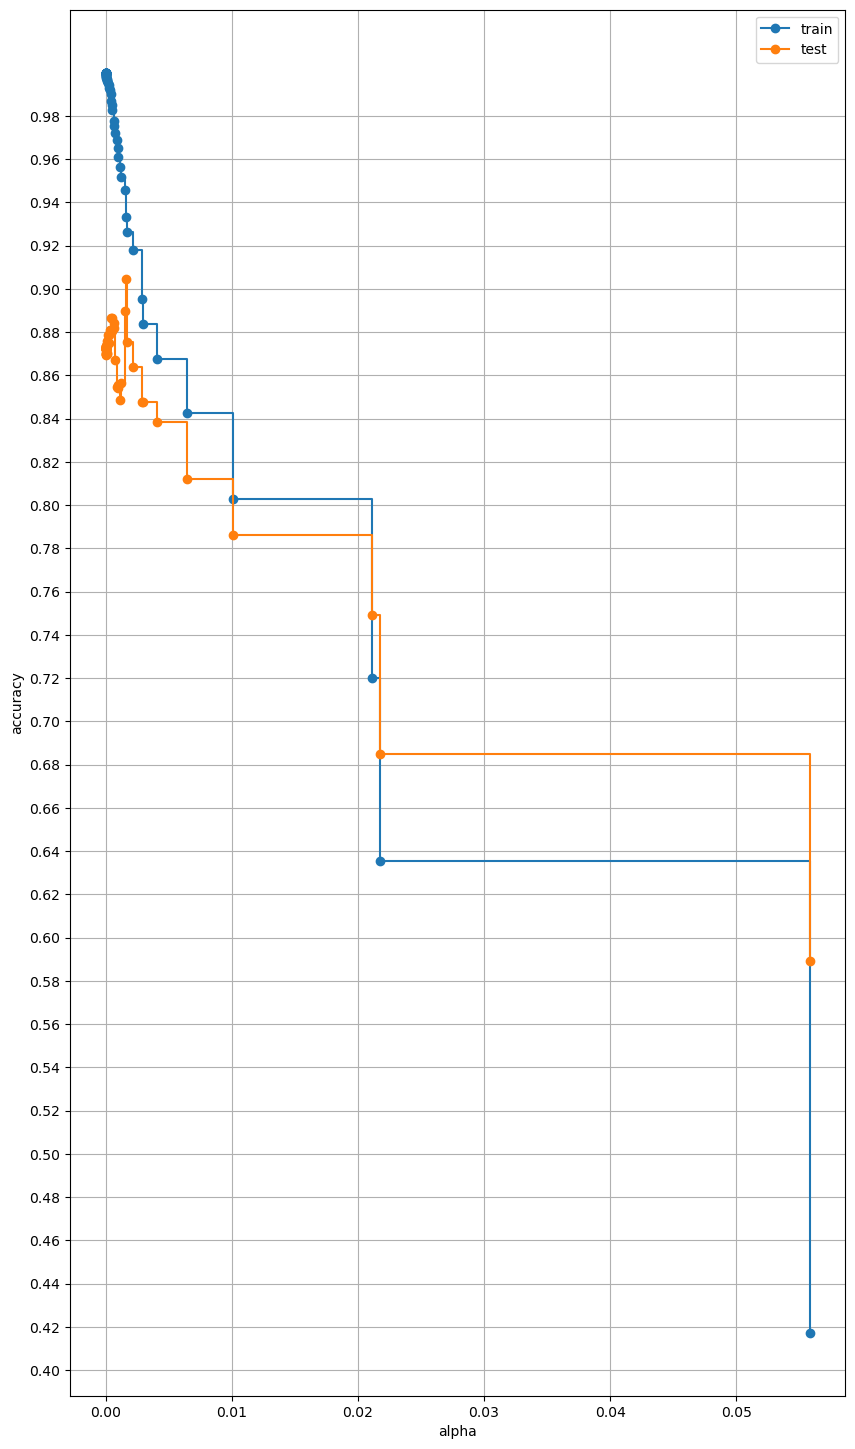

In [181]:
train_scores=[model.score(x_train,y_train) for model in models]
test_scores=[model.score(x_test,y_test) for model in models]
plt.figure(figsize=(10,18))
plt.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
plt.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.xticks([0.0,0.01,0.02,0.03,0.04,0.05])
plt.yticks(np.arange(0.4,1,0.02))
plt.grid()
plt.legend()
plt.show()

In [182]:
model3 = DecisionTreeRegressor(random_state=0,ccp_alpha=0.01)

In [183]:
model3.fit(x_train,y_train)
train_score = model3.score(x_train,y_train)
test_score = model3.score(x_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.84, Testing Score 0.81


<Axes: xlabel='tree'>

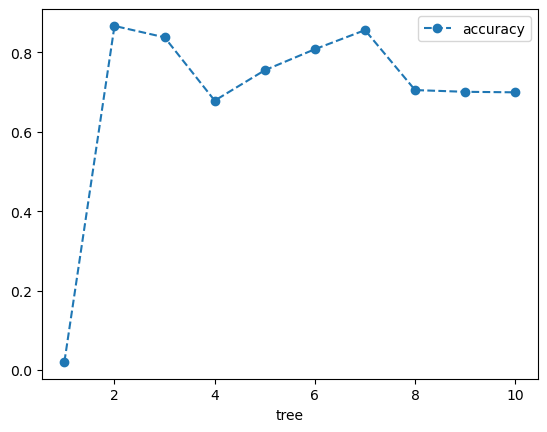

In [184]:
scores=cross_val_score(model3,x_train,y_train,cv=10)
df=pd.DataFrame(data={'tree':range(1,11),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [185]:
print(scores)
print(scores.mean())

[0.02051922 0.86648313 0.83775623 0.67841286 0.75495957 0.80786575
 0.85591992 0.70494679 0.70061364 0.69928295]
0.6926760063550987


In [186]:
ccp_alphas

array([0.00000000e+00, 5.62806127e-16, 5.62806127e-16, 8.44209191e-16,
       8.44209191e-16, 2.25122451e-15, 3.65823983e-15, 5.10250724e-07,
       6.80334299e-07, 1.15799361e-06, 3.05291659e-06, 5.23827267e-06,
       7.79454173e-06, 7.85740900e-06, 1.15747468e-05, 1.19559127e-05,
       1.61736845e-05, 2.69659585e-05, 3.45193674e-05, 3.87009410e-05,
       3.95205308e-05, 4.74246370e-05, 5.19370407e-05, 5.38503885e-05,
       6.42956941e-05, 7.70002496e-05, 7.72949168e-05, 8.04720839e-05,
       1.08931918e-04, 1.49997748e-04, 2.19413532e-04, 2.39882094e-04,
       3.01143410e-04, 3.34548966e-04, 4.01524667e-04, 4.47133143e-04,
       4.83508215e-04, 5.32343430e-04, 6.37613811e-04, 6.60205920e-04,
       7.52603481e-04, 9.05258768e-04, 9.57285433e-04, 1.00530589e-03,
       1.16947416e-03, 1.19263311e-03, 1.52087991e-03, 1.63444706e-03,
       1.72422161e-03, 2.16264426e-03, 2.92475147e-03, 2.94766582e-03,
       4.08158687e-03, 6.46693514e-03, 1.01439942e-02, 2.11556774e-02,
      

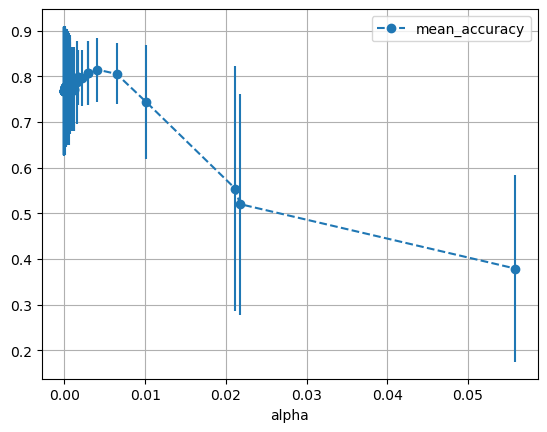

In [187]:
# create an array to store the results of each fold during cross validations
alpha_loop_values=[]

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (The accuracy) for each call to cross_val_score in alpha_loop_values

for i in ccp_alphas:
    model4=DecisionTreeRegressor(random_state=0,ccp_alpha=i)
    scores=cross_val_score(model4,x_train,y_train,cv=5)
    alpha_loop_values.append([i,np.mean(scores),np.std(scores)])
    
## Now we can draw a graph of the means and standard deviations of the scores for each candidate  value for alpha

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')
plt.grid()
plt.show()

In [188]:
alpha_loop_values

[[0.0, 0.7675626060724277, 0.1402959225013421],
 [5.628061273347328e-16, 0.7675626060724277, 0.1402959225013421],
 [5.628061273347328e-16, 0.7675626060724277, 0.1402959225013421],
 [8.442091910020992e-16, 0.7675626060724277, 0.1402959225013421],
 [8.442091910020992e-16, 0.7675626060724277, 0.1402959225013421],
 [2.2512245093389313e-15, 0.7675626060724277, 0.1402959225013421],
 [3.6582398276757634e-15, 0.7675626060724277, 0.1402959225013421],
 [5.102507244184453e-07, 0.7675626060724277, 0.1402959225013421],
 [6.803342992245936e-07, 0.7675111128643491, 0.14025847047799417],
 [1.1579936074325598e-06, 0.7675094995887408, 0.14025726427392327],
 [3.0529165888373705e-06, 0.7672407971461072, 0.14008299317358705],
 [5.23827266686855e-06, 0.7671298809971425, 0.1400959915574413],
 [7.794541734076101e-06, 0.7668081698298391, 0.14073234192334963],
 [7.857409000865632e-06, 0.7668081698298391, 0.14073234192334963],
 [1.1574746766015805e-05, 0.7686028558944923, 0.14047830957316773],
 [1.19559127365999

In [189]:
alpha_results

,alpha,mean_accuracy,std
0,0.000000e+00,0.767563,0.140296
1,5.628061e-16,0.767563,0.140296
2,5.628061e-16,0.767563,0.140296
3,8.442092e-16,0.767563,0.140296
4,8.442092e-16,0.767563,0.140296
5,2.251225e-15,0.767563,0.140296
6,3.658240e-15,0.767563,0.140296
7,5.102507e-07,0.767563,0.140296
8,6.803343e-07,0.767511,0.140258
9,1.157994e-06,0.767509,0.140257


In [190]:
ideal_ccp_alpha=4.081587*10**(-3)

In [191]:
model5=DecisionTreeRegressor(random_state=0,ccp_alpha= 4.081587*10**(-3))

In [192]:
model5.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.004081587, random_state=0)

In [193]:
# Predicting for training and testing 
ytrain_pred = model5.predict(x_train)
ytest_pred = model5.predict(x_test)

In [194]:
model5.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.004081587, random_state=0)

In [195]:
# Model Evaluation

train_score = model5.score(x_train,y_train)
test_score = model5.score(x_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.87, Testing Score 0.84


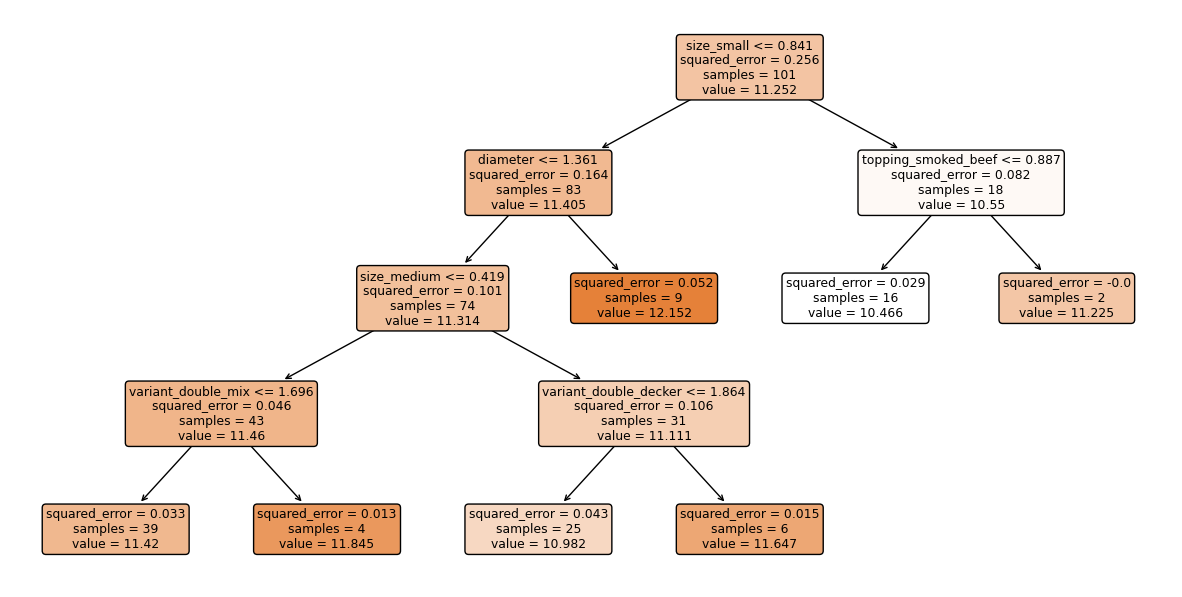

In [196]:
plt.figure(figsize=(15,7.5))
plot_tree(model5,filled=True,rounded=True,class_names=['No HD','Yes HD'],feature_names=x.columns.to_list())
plt.show()

### Random Forest

In [198]:
model1 = RandomForestRegressor(n_estimators=100,random_state=0)
model1.fit(x_train,y_train)
y_train_pred=model1.predict(x_train)
y_test_pred=model1.predict(x_test)

In [199]:
from sklearn.metrics import mean_squared_error,r2_score
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)
print(f'MSE_y_train ={train_mse}')
print(f'MSE_y_test ={test_mse}')
print(f'RMSE_y_train ={np.sqrt(train_mse)}')
print(f'RMSE_y_test ={np.sqrt(test_mse)}')
print(f'train_r-squared ={r2_score(y_train,y_train_pred)}')
print(f'test_r-squared ={r2_score(y_test,y_test_pred)}')

MSE_y_train =0.0034740647640428396
MSE_y_test =0.01040048526890129
RMSE_y_train =0.058941197511102876
RMSE_y_test =0.10198276947063797
train_r-squared =0.9864332874161059
test_r-squared =0.9626029979081683


Overall Observations: <br>
Random Forest outperformed other models, showcasing their ability to handle intricate patterns in the data.<br>